### John Keating Benson Challenges
### 

In [1]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter
import pandas as pd

### Challenge _1_

In [2]:
# function to read in the csv file
def get_turnstiles(dates):
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
    extension = '.txt'
    url_list = []

    for date in dates:
        url_list.append(url + date + extension)

    df = pd.DataFrame()

    for t in url_list:
        week = pd.read_csv(t)
        
        frames = [df, week]
        
        df = pd.concat(frames, axis=0, ignore_index=True)
        
    return df

In [3]:
dates = ['150502', '150509','150516','150523','150530']

In [4]:
%time
df = get_turnstiles(dates)
df.head()

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 4.05 µs


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,00:00:00,REGULAR,5106770,1729635
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,04:00:00,REGULAR,5106810,1729649
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,08:00:00,REGULAR,5106835,1729680
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,12:00:00,REGULAR,5106961,1729784
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,16:00:00,REGULAR,5107250,1729858


In [5]:
# strip out all of the white space and lowercase the column names
def strip_white(df):
    df.rename(columns= lambda x: x.strip().lower(), inplace= True)
    return df

In [6]:
df = strip_white(df)
df.columns

Index([u'c/a', u'unit', u'scp', u'station', u'linename', u'division', u'date',
       u'time', u'desc', u'entries', u'exits'],
      dtype='object')

In [7]:
# produce a dictionary with the first 4 columns as keys
# the rest of the columns will be lists of lists

#def turnstiles_dict(df, key_list):
    df_dict = df.set_index(key_list).T.to_dict('list')
    return df_dict

#%time
dict_turnstiles = turnstiles_dict(df, ['c/a', 'unit', 'scp', 'station'])
print dict_turnstiles.items()[100]

print dict_turnstiles.items()[0]

it is only produceing 1 list per dictionary key. It must be overwriting previous columns - will only work if everything is unique

%time
#def turnstiles_dict_zip(df):
    df_dict = dict(zip())

%time
#def turnstiles_dict_looping(df):
    df_dict = {}
    for row in df.iterrows():
        df_dict.

IndentationError: unexpected indent (<ipython-input-7-90f92986ba96>, line 5)

In [8]:
key_list = ['c/a', 'unit', 'scp', 'station']
item_list = ['linename', 'division', 'date', 'time', 'desc', 'entries', 'exits']
dt = {x: g[item_list].values.tolist() for x,g in df.groupby(key_list)}

In [9]:
print dt.items()[0][0]
print dt.items()[0][1][0]

('A030', 'R083', '01-06-00', '23 ST-5 AVE')
['NR', 'BMT', '04/25/2015', '00:00:00', 'REGULAR', 5825571, 3246989]


#### dt is the answer for challenge 1

### Challenge 2

In [10]:
dt_datetime = {turnstile:
               [(datetime.strptime(date + time, '%m/%d/%Y%X'),
               int(entries))
                for _, _, date, time, _, entries, _ in rows]
              for turnstile, rows in dt.items()}

In [11]:
print dt_datetime.items()[0][0]
print dt_datetime.items()[0][1][0:3]

('A030', 'R083', '01-06-00', '23 ST-5 AVE')
[(datetime.datetime(2015, 4, 25, 0, 0), 5825571), (datetime.datetime(2015, 4, 25, 4, 0), 5825639), (datetime.datetime(2015, 4, 25, 8, 0), 5825667)]


#### dt_datetime is the answer for Challenge 2

### Challenge 3

In [12]:
%time
dt_days = {}
for turnstile, row in dt_datetime.items():
    day_dict = {}
    for time, entries in row:
        day = time.date()
        day_dict[day] = day_dict.get(day, 0) + entries
    dt_days[turnstile] = sorted(day_dict.items())

CPU times: user 3 µs, sys: 16 µs, total: 19 µs
Wall time: 8.11 µs


In [13]:
dt_days.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [(datetime.date(2015, 4, 25), 34955221),
  (datetime.date(2015, 4, 26), 34961606),
  (datetime.date(2015, 4, 27), 34969448),
  (datetime.date(2015, 4, 28), 34984866),
  (datetime.date(2015, 4, 29), 35001457),
  (datetime.date(2015, 4, 30), 35018420),
  (datetime.date(2015, 5, 1), 35034754),
  (datetime.date(2015, 5, 2), 35047976),
  (datetime.date(2015, 5, 3), 35054950),
  (datetime.date(2015, 5, 4), 35063051),
  (datetime.date(2015, 5, 5), 35078964),
  (datetime.date(2015, 5, 6), 35095442),
  (datetime.date(2015, 5, 7), 35111766),
  (datetime.date(2015, 5, 8), 35126854),
  (datetime.date(2015, 5, 9), 35138346),
  (datetime.date(2015, 5, 10), 29286316),
  (datetime.date(2015, 5, 12), 17575346),
  (datetime.date(2015, 5, 13), 35162596),
  (datetime.date(2015, 5, 14), 35179947),
  (datetime.date(2015, 5, 15), 35196843),
  (datetime.date(2015, 5, 16), 35209591),
  (datetime.date(2015, 5, 17), 35216130),
  (datetime.date(2015, 5, 18), 35223529

#### dt_days is the answer for Challenge 3

### Challenge 4

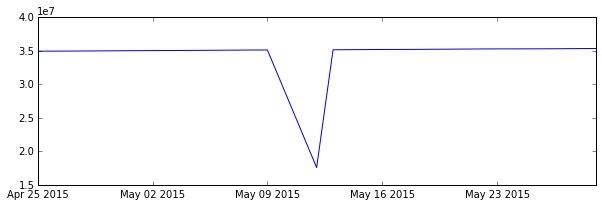

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

dates = []
counts = []

for day in dt_days.items()[0][1]:
    dates.append(day[0])
    counts.append(day[1])

plt.figure(figsize=(10,3))
plt.plot(dates,counts)

### Challenge 5 and 6

In [15]:
dt_station = {}

for turnstile, row in dt_datetime.items():
    day_dict = {}
    station = list(turnstile)
    station.remove(turnstile[2])
    station = tuple(station)
    for time, entries in row:
        day = time.date()
        day_dict[day] = day_dict.get(day, 0) + entries
    dt_station[station] = sorted(day_dict.items())


In [16]:
print dt_station.items()[0][1]

[(datetime.date(2015, 4, 25), 3987091916), (datetime.date(2015, 4, 26), 3987097145), (datetime.date(2015, 4, 27), 3987104410), (datetime.date(2015, 4, 28), 3987113945), (datetime.date(2015, 4, 29), 3987123759), (datetime.date(2015, 4, 30), 3987133187), (datetime.date(2015, 5, 1), 3987142858), (datetime.date(2015, 5, 2), 5316201389), (datetime.date(2015, 5, 3), 3987156147), (datetime.date(2015, 5, 4), 3987163989), (datetime.date(2015, 5, 5), 3987173749), (datetime.date(2015, 5, 6), 3987183472), (datetime.date(2015, 5, 7), 3987193106), (datetime.date(2015, 5, 8), 3987202592), (datetime.date(2015, 5, 9), 3987210151), (datetime.date(2015, 5, 10), 3987215654), (datetime.date(2015, 5, 11), 3987222940), (datetime.date(2015, 5, 12), 3987232414), (datetime.date(2015, 5, 13), 3987242034), (datetime.date(2015, 5, 14), 3987251640), (datetime.date(2015, 5, 15), 3987261064), (datetime.date(2015, 5, 16), 3987268397), (datetime.date(2015, 5, 17), 3987273960), (datetime.date(2015, 5, 18), 3987281410), 

#### dt_station is the answer for both Challenge 5 and Challenge 6

### Challenge 7

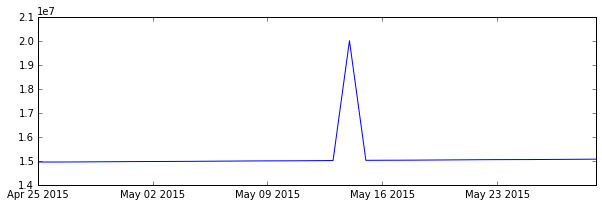

In [17]:
dates = []
counts = []

for day in dt_station.items()[300][1]:
    dates.append(day[0])
    counts.append(day[1])

plt.figure(figsize=(10,3))
plt.plot(dates,counts)

### Challenge 8

In [72]:
df_oxford_104 = pd.DataFrame(dt_station.values()[300],
                               columns=['date', 'entries'])


df_oxford_104['day'] = df_oxford_104['date'].apply(lambda x: x.strftime('%A'))
df_oxford_104['date'] = df_oxford_104['date'].apply(lambda x: pd.to_datetime(x))
df_oxford_104['day_of_week'] = df_oxford_104['date'].apply(lambda x: x.strftime('%w'))
df_oxford_104['week_no'] = df_oxford_104['date'].apply(lambda x: x.strftime('%U'))
df_oxford_104.sort(['date','day_of_week'], inplace=True)
df_oxford_104.head()

,date,entries,day,day_of_week,week_no
0,2015-04-25,14952244,Saturday,6,16
1,2015-04-26,14952246,Sunday,0,17
2,2015-04-27,14954395,Monday,1,17
3,2015-04-28,14958788,Tuesday,2,17
4,2015-04-29,14963158,Wednesday,3,17


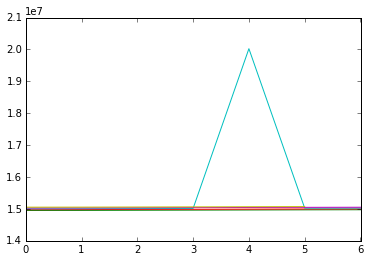

In [76]:
for k, group in df_oxford_104.groupby(
    [df_oxford_104.week_no]):
    plt.plot(group['entries'])

#### Dark Side of the Moon is the answer for Challenge 8

### Challenge 9

In [188]:
dt_totals = {}

for station, rows in dt_station.items():
    total_entries = []
    for row in rows:
        total_entries.append(row[1])
    dt_totals[station] = sum(total_entries)

print dt_totals.items()[0:4]

[(('N325A', 'R218', 'ELMHURST AVE'), 141546752851), (('R137', 'R031', '34 ST-PENN STA'), 877431928), (('R414', 'R162', 'ELDER AVE'), 1832393550), (('D012', 'R395', 'KINGS HIGHWAY'), 711825432)]


#### dt_totals is the answer for Challenge 9

### Challenge 10

In [195]:
df_totals = pd.DataFrame(dt_totals.items(), columns = ['station', 'ridership'])
print len(df_totals)
df_totals.head()

726


,station,ridership
0,"(N325A, R218, ELMHURST AVE)",141546752851
1,"(R137, R031, 34 ST-PENN STA)",877431928
2,"(R414, R162, ELDER AVE)",1832393550
3,"(D012, R395, KINGS HIGHWAY)",711825432
4,"(R291, R183, BEDFORD PARK BL)",1127994162


In [193]:
total_ridership_counts = list(df_totals['ridership'])

(array([ 710.,    3.,    1.,    4.,    1.,    1.,    1.,    0.,    2.,    3.]),
 array([  0.00000000e+00,   3.73656302e+10,   7.47312603e+10,
          1.12096891e+11,   1.49462521e+11,   1.86828151e+11,
          2.24193781e+11,   2.61559411e+11,   2.98925041e+11,
          3.36290672e+11,   3.73656302e+11]),
 <a list of 10 Patch objects>)

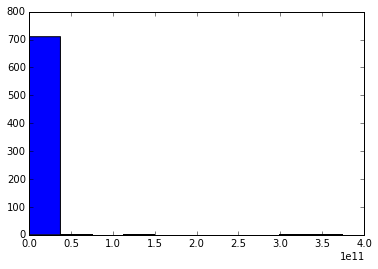

In [194]:
plt.hist(total_ridership_counts)

<Container object of 726 artists>

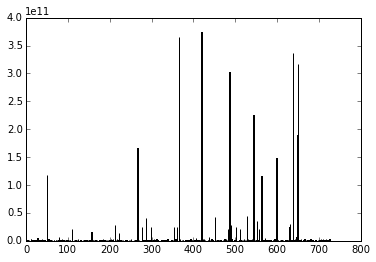

In [197]:
indices = range(len(total_ridership_counts))
plt.bar(indices, total_ridership_counts)